# Setup and downloading data

In [97]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
!pip install kaggle

In [98]:
DATA = Path('/content/gdrive/MyDrive/DAT255/formula1-classifier')
DATA.mkdir(exist_ok=True, parents=True)

In [99]:
from google.colab import files
uploaded = files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [100]:
if not os.path.isfile(DATA/'formula-one-cars.zip'):
    !kaggle datasets download -d vesuvius13/formula-one-cars -p $DATA

# Exploring data

In [101]:
import shutil
if not os.path.exists(DATA/'Formula One Cars'):
    shutil.unpack_archive(DATA/'formula-one-cars.zip', extract_dir=DATA)

In [102]:
DATA.ls()

(#4) [Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/formula-one-cars.zip'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/models'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/images')]

In [103]:
(DATA/'Formula One Cars').ls()

(#8) [Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Ferrari F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/McLaren F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Mercedes F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Racing Point F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Red Bull Racing F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Renault F1 car'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/Williams F1 car')]

In [104]:
path = DATA/'Formula One Cars'
(path/'AlphaTauri F1 car').ls()

(#123) [Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000005.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000010.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000011.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000014.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000015.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000018.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000020.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000022.jpg'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000024.jpg'),Path('/content/gdrive/MyDrive

In [105]:
test_img = (path/'AlphaTauri F1 car').ls()[0]
test_img

Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars/AlphaTauri F1 car/00000005.jpg')

In [106]:
img = load_image(test_img)
#img

In [107]:
img.shape

(1000, 1500)

In [108]:
for img in (path/'AlphaTauri F1 car').ls()[:5]:
    img = load_image(img)
    #display(img)
    print(img.shape)
    print("#"*40)

(1000, 1500)
########################################
(1800, 2880)
########################################
(668, 1000)
########################################
(682, 1024)
########################################
(1067, 1600)
########################################


In [109]:
from PIL import Image
for team_folder in os.listdir(path):
    team_path = os.path.join(path, team_folder)
    for img_file in os.listdir(team_path):
      img_path = os.path.join(team_path, img_file)
      try:
        img = Image.open(img_path)
        img.verify()
      except:
        print(f"Deleting '{team_folder}/{img_file}' because of curruption")
        os.remove(img_path)

In [110]:
dls = ImageDataLoaders.from_folder(path, train = ["train"], valid_pct=0.2)

In [111]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [112]:
dls = cars.dataloaders(path)

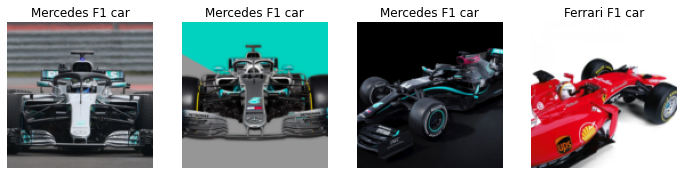

In [113]:
dls.valid.show_batch(max_n=4, nrows=1)

In [114]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

SuggestedLRs(valley=0.0012022644514217973)

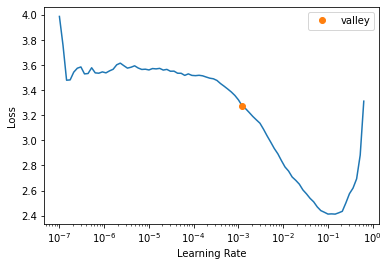

In [115]:
learn.lr_find()

In [116]:
learn.fine_tune(5, 1.2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.730932,1.163555,0.392931,03:11


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.487584,0.981336,0.316008,04:04
1,1.173978,0.887933,0.280665,04:02
2,0.896165,0.754848,0.239085,04:03
3,0.698175,0.726089,0.226611,04:03
4,0.567182,0.718393,0.220374,04:02


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

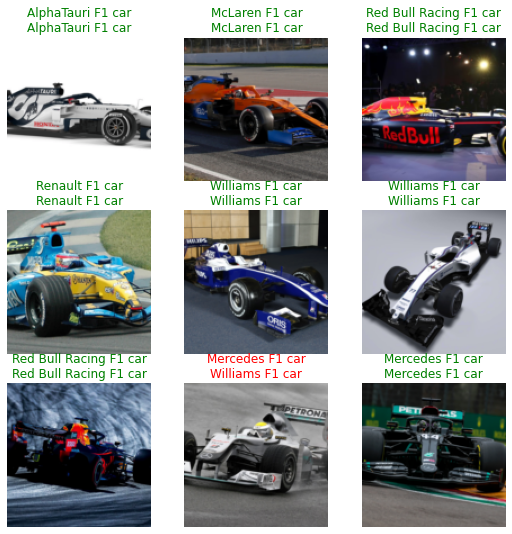

In [117]:
learn.show_results()

In [118]:
interp = Interpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


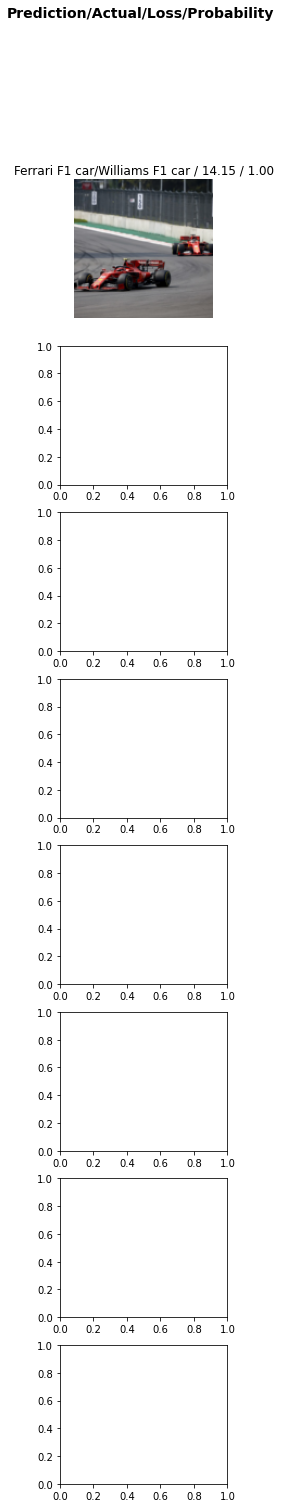

In [119]:
interp.plot_top_losses(k=8, nrows=8)

In [120]:
a = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


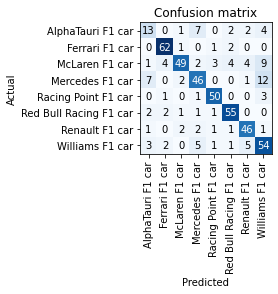

In [121]:
a.plot_confusion_matrix()

In [122]:
path

Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars')

In [123]:
DATA

Path('/content/gdrive/MyDrive/DAT255/formula1-classifier')

In [124]:
(DATA).ls()

(#4) [Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/formula-one-cars.zip'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/Formula One Cars'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/models'),Path('/content/gdrive/MyDrive/DAT255/formula1-classifier/images')]

In [125]:
NB_DIR = Path.cwd()
MODELS = DATA/'models'
MODELS.mkdir(exist_ok=True)

In [127]:
learn.export(MODELS/'f1_classifier_v2')